In [ ]:
# Importación de bibliotecas para tratamiento de datos y gráficos
# ==============================================================================
import pandas as pd            # Para manipulación de datos en tablas (DataFrames)
import numpy as np             # Para operaciones numéricas y algebra lineal

# Bibliotecas para gráficos
# ==============================================================================
import matplotlib.pyplot as plt    # Para crear gráficos
from matplotlib import style       # Para configurar el estilo de gráficos
import seaborn as sns              # Para gráficos estadísticos
from mlxtend.plotting import plot_decision_regions # Para visualizar límites de decisión

# Bibliotecas para preprocesamiento y modelado
# ==============================================================================
from sklearn.svm import SVC                       # Para construir el modelo SVM
from sklearn.model_selection import train_test_split, GridSearchCV  # Para división de datos y búsqueda de hiperparámetros
from sklearn.metrics import accuracy_score        # Para evaluar la precisión del modelo
from sklearn.preprocessing import StandardScaler  # Para escalar datos (normalización)
from sklearn import metrics                       # Para métricas de evaluación

# Configuración de Matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"    # Colores para gráficos
style.use('ggplot') or plt.style.use('ggplot')  # Estilo ggplot para gráficos

# Configuración para ignorar advertencias
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')    # Ignorar mensajes de advertencia

In [ ]:
# """SVM - Classification """

# Datos
#Se emplea un set de datos publicado en el libro Elements of Statistical Learning que contiene observaciones simuladas
#con una función no lineal en un espacio de dos dimensiones (2 predictores).
# El objetivo es entrenar un modelo SVM capaz de clasificar las observaciones.

url = 'https://raw.githubusercontent.com/JoaquinAmatRodrigo/' \
       + 'Estadistica-machine-learning-python/master/data/ESL.mixture.csv'
datos = pd.read_csv(url)
datos.head(3)  # Muestra las primeras filas del dataset
datos.info()
datos.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      200 non-null    float64
 1   X2      200 non-null    float64
 2   y       200 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 4.8 KB


,X1,X2,y
count,200.000000,200.000000,200.000000
mean,0.784672,0.756016,0.500000
std,1.297582,1.026442,0.501255
min,-2.520820,-1.999853,0.000000
25%,-0.071465,0.095555,0.000000
50%,0.859702,0.861387,0.500000
75%,1.543438,1.435275,1.000000
max,4.170746,2.855805,1.000000


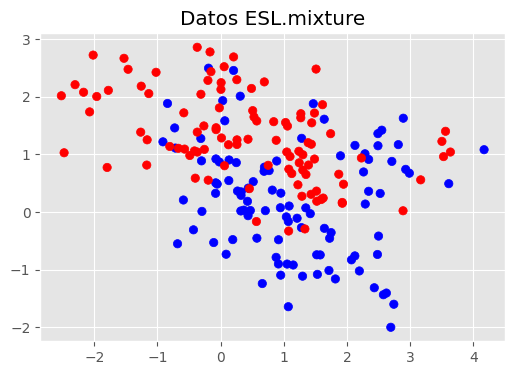

In [ ]:
# Gráfico inicial de los datos
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(datos.X1, datos.X2, c=datos.y);  # Visualización en 2D de las clases
ax.set_title("Datos ESL.mixture");

In [ ]:
# División de los datos en conjunto de entrenamiento y prueba
# ==============================================================================
X = datos.drop(columns = 'y')    # Variables independientes (predictores)
y = datos['y']                   # Variable dependiente (etiqueta)

# División de los datos (80% entrenamiento y 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y.values.reshape(-1,1),
                         train_size = 0.8, random_state = 1234, shuffle = True)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Escalar los datos de entrenamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Creación del modelo SVM lineal
# ==============================================================================
#https://scikit-learn.org/dev/modules/generated/sklearn.svm.SVC.html


modelo = SVC(C = 100, kernel = 'linear', random_state=500)  # Modelo SVM con margen de error C=100
modelo.fit(X_train, y_train)   # Entrena el modelo con el conjunto de entrenamiento

SVC(C=100, kernel='linear', random_state=500)

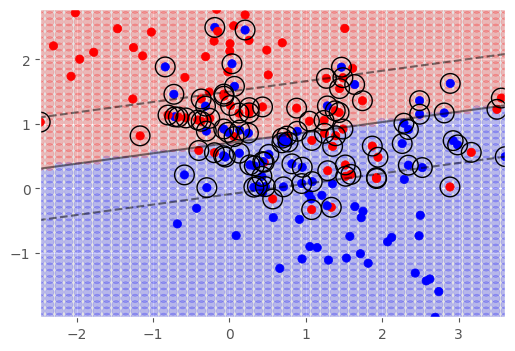

In [ ]:
# Representación gráfica de los límites de clasificación del SVM lineal
# ==============================================================================
# Crear una cuadrícula de puntos para visualización
x = np.linspace(np.min(X_train.X1), np.max(X_train.X1), 50)
y = np.linspace(np.min(X_train.X2), np.max(X_train.X2), 50)
Y, X = np.meshgrid(y, x)
grid = np.vstack([X.ravel(), Y.ravel()]).T

# Predicción en la cuadrícula para graficar límites de clasificación
pred_grid = modelo.predict(grid)

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(grid[:,0], grid[:,1], c=pred_grid, alpha = 0.2)  # Visualización de las áreas de cada clase
ax.scatter(X_train.X1, X_train.X2, c=y_train, alpha = 1)    # Visualización de los datos de entrenamiento

# Visualización de vectores de soporte (puntos más cercanos al hiperplano)
ax.scatter(
    modelo.support_vectors_[:, 0],
    modelo.support_vectors_[:, 1],
    s=200, linewidth=1,
    facecolors='none', edgecolors='black'
)

# Graficar el hiperplano de separación
ax.contour(X, Y, modelo.decision_function(grid).reshape(X.shape),
    colors = 'k',
    levels = [-1, 0, 1],
    alpha  = 0.5,
    linestyles = ['--', '-', '--']
)

In [ ]:
# Predicciones en el conjunto de prueba
# ==============================================================================
predicciones = modelo.predict(X_test)  # Predicción en los datos de prueba

# Calcular la precisión (accuracy) del modelo en los datos de prueba
# ==============================================================================
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy:.2f}%")



El accuracy de test es: 70.00%


In [ ]:
# Búsqueda de hiperparámetros para un modelo SVM radial
# ==============================================================================
param_grid = {'C': np.logspace(-2, 5, 100)}  # Rango de valores para el parámetro de penalización C

# Validación cruzada con búsqueda de hiperparámetros
grid = GridSearchCV(
        estimator  = SVC(kernel= "linear", gamma='scale'),  # Modelo con kernel radial (rbf)
        param_grid = param_grid,
        scoring    = 'accuracy',  # Métrica para evaluar
        n_jobs     = -1,          # Usar todos los núcleos
        cv         = 3,           # 3 particiones para validación cruzada
        verbose    = 0,
        return_train_score = True
      )

_ = grid.fit(X = X_train, y = y_train)  # Ajustar la búsqueda en los datos de entrenamiento

# Resultados de la búsqueda de hiperparámetros
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)  # Convierte resultados en DataFrame
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)

# Mostrar los mejores hiperparámetros encontrados
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

# Usar el mejor modelo encontrado
modelo = grid.best_estimator_

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'C': 0.019179102616724886} : 0.75658047985092 accuracy


###SVM Radial

In [ ]:
# SVM radial

# Búsqueda de hiperparámetros para un modelo SVM radial
# ==============================================================================
param_grid = {'C': np.logspace(-5, 7, 20)}  # Rango de valores para el parámetro de penalización C

# Validación cruzada con búsqueda de hiperparámetros
grid = GridSearchCV(
        estimator  = SVC(kernel= "rbf", gamma='scale'),  # Modelo con kernel radial (rbf)
        param_grid = param_grid,
        scoring    = 'accuracy',  # Métrica para evaluar
        n_jobs     = -1,          # Usar todos los núcleos
        cv         = 3,           # 3 particiones para validación cruzada
        verbose    = 0,
        return_train_score = True
      )

_ = grid.fit(X = X_train, y = y_train)  # Ajustar la búsqueda en los datos de entrenamiento

# Resultados de la búsqueda de hiperparámetros
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)  # Convierte resultados en DataFrame
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)

# Mostrar los mejores hiperparámetros encontrados
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

# Usar el mejor modelo encontrado
modelo = grid.best_estimator_



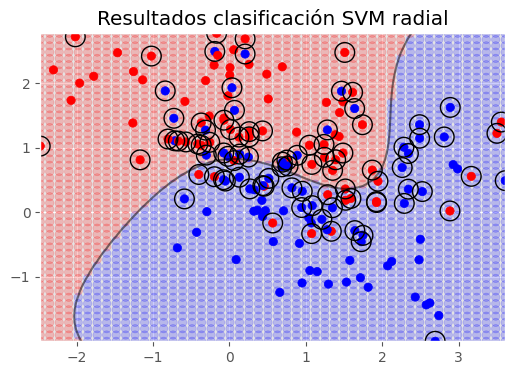

In [ ]:
# Representación gráfica de los límites de clasificación con el mejor modelo (SVM radial)
# ==============================================================================
# Generar cuadrícula de valores para visualización
x = np.linspace(np.min(X_train.X1), np.max(X_train.X1), 50)
y = np.linspace(np.min(X_train.X2), np.max(X_train.X2), 50)
Y, X = np.meshgrid(y, x)
grid = np.vstack([X.ravel(), Y.ravel()]).T

# Predicciones para la cuadrícula con el mejor modelo
pred_grid = modelo.predict(grid)

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(grid[:,0], grid[:,1], c=pred_grid, alpha = 0.2)
ax.scatter(X_train.X1, X_train.X2, c=y_train, alpha = 1)

# Visualización de vectores soporte y el hiperplano de separación
ax.scatter(
    modelo.support_vectors_[:, 0],
    modelo.support_vectors_[:, 1],
    s=200, linewidth=1,
    facecolors='none', edgecolors='black'
)
ax.contour(
    X,
    Y,
    modelo.decision_function(grid).reshape(X.shape),
    colors='k',
    levels=[0],
    alpha=0.5,
    linestyles='-'
)
ax.set_title("Resultados clasificación SVM radial");



In [ ]:
# Representación gráfica utilizando plot_decision_regions() de mlxtend
# ==============================================================================
fig, ax = plt.subplots(figsize=(6,4))
plot_decision_regions(
    X = X_train.to_numpy(),
    y = y_train.flatten(),
    clf = modelo,
    ax = ax
)
ax.set_title("Resultados clasificación SVM radial");

# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X_test)

# Accuracy de test del modelo
# ==============================================================================
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")

# Matriz de confusión de las predicciones de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    predicciones,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix